In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### 파일 경로에 있는 파일 검색

In [3]:
import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./crawling.py
./FoodEmissions.ipynb
./Food_Product_Emissions.csv
./.ipynb_checkpoints\FoodEmissions-checkpoint.ipynb


### 데이터 읽기

In [4]:
df_food = pd.read_csv('./Food_Product_Emissions.csv')
# df_food = food products global average emissions from Science and Our World in Data

In [5]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Food product                               43 non-null     object 
 1   Land Use Change                            43 non-null     float64
 2   Feed                                       43 non-null     float64
 3   Farm                                       43 non-null     float64
 4   Processing                                 43 non-null     float64
 5   Transport                                  43 non-null     float64
 6   Packaging                                  43 non-null     float64
 7   Retail                                     43 non-null     float64
 8   Total from Land to Retail                  43 non-null     float64
 9   Total Global Average GHG Emissions per kg  43 non-null     float64
 10  Unit of GHG Emissions       

### 컬럼 설명
Food product : 식품 종류    
Land Use Change :   
Feed :    
Farm :   
Processing :   
Transport : 운반 시 배출량   
Packaging : 포장 시 배출량   
Retail : 소매점까지 소비되는 배출량   
Total from Land to Retail :   


In [6]:
df_food.isna().sum()

Food product                                 0
Land Use Change                              0
Feed                                         0
Farm                                         0
Processing                                   0
Transport                                    0
Packaging                                    0
Retail                                       0
Total from Land to Retail                    0
Total Global Average GHG Emissions per kg    0
Unit of GHG Emissions                        0
dtype: int64

In [7]:
df_food.head()

,Food product,Land Use Change,Feed,Farm,Processing,Transport,Packaging,Retail,Total from Land to Retail,Total Global Average GHG Emissions per kg,Unit of GHG Emissions
0,Apples,-0.029,0.000,0.225,0.004,0.096,0.044,0.017,0.357,0.43,kg CO2e per kg food produced
1,Bananas,-0.025,0.000,0.266,0.059,0.292,0.065,0.021,0.678,0.86,kg CO2e per kg food produced
2,Barley,0.009,0.000,0.176,0.128,0.035,0.497,0.264,1.109,1.18,kg CO2e per kg food produced
3,Beef (beef herd),16.278,1.878,39.388,1.269,0.346,0.247,0.164,59.570,99.48,kg CO2e per kg food produced
4,Beef (dairy herd),0.906,2.508,15.689,1.108,0.424,0.268,0.182,21.085,33.30,kg CO2e per kg food produced


In [8]:
df_food['Food product'].unique()

array(['Apples', 'Bananas', 'Barley', 'Beef (beef herd)',
       'Beef (dairy herd)', 'Beet Sugar', 'Berries & Grapes', 'Brassicas',
       'Cane Sugar', 'Cassava', 'Cheese', 'Citrus Fruit', 'Coffee',
       'Dark Chocolate', 'Eggs', 'Fish (farmed)', 'Groundnuts',
       'Lamb & Mutton', 'Maize', 'Milk', 'Nuts', 'Oatmeal', 'Olive Oil',
       'Onions & Leeks', 'Other Fruit', 'Other Pulses',
       'Other Vegetables', 'Palm Oil', 'Peas', 'Pig Meat', 'Potatoes',
       'Poultry Meat', 'Rapeseed Oil', 'Rice', 'Root Vegetables',
       'Shrimps (farmed)', 'Soybean Oil', 'Soymilk', 'Sunflower Oil',
       'Tofu', 'Tomatoes', 'Wheat & Rye', 'Wine'], dtype=object)

In [9]:
df_food['Food product'].count()

43

### 데이터 전처리

단위에 대한 컬럼은 데이터가 다 똑같으니 지워주기

In [10]:
df_foods = df_food.drop(columns={'Unit of GHG Emissions'})
df_foods

,Food product,Land Use Change,Feed,Farm,Processing,Transport,Packaging,Retail,Total from Land to Retail,Total Global Average GHG Emissions per kg
0,Apples,-0.029,0.000,0.225,0.004,0.096,0.044,0.017,0.357,0.43
1,Bananas,-0.025,0.000,0.266,0.059,0.292,0.065,0.021,0.678,0.86
2,Barley,0.009,0.000,0.176,0.128,0.035,0.497,0.264,1.109,1.18
3,Beef (beef herd),16.278,1.878,39.388,1.269,0.346,0.247,0.164,59.570,99.48
4,Beef (dairy herd),0.906,2.508,15.689,1.108,0.424,0.268,0.182,21.085,33.30
5,Beet Sugar,0.000,0.000,0.536,0.242,0.629,0.090,0.039,1.536,1.81
6,Berries & Grapes,0.025,0.000,0.722,0.000,0.238,0.212,0.017,1.214,1.53
7,Brassicas,0.002,0.000,0.278,0.000,0.095,0.045,0.017,0.437,0.51
8,Cane Sugar,1.247,0.000,0.485,0.037,0.784,0.083,0.036,2.672,3.20
9,Cassava,0.589,0.000,0.220,0.000,0.094,0.045,0.039,0.987,1.32


Total from Land to Retail을 기준으로 정렬

In [43]:
df_foods_sc = df_foods[['Food product', 'Land Use Change', 'Feed', 'Farm', 'Processing', 'Transport', 'Packaging', 'Retail', 'Total from Land to Retail']].sort_values(by='Total from Land to Retail', ascending=True)
df_foods_sc

,Food product,Land Use Change,Feed,Farm,Processing,Transport,Packaging,Retail,Total from Land to Retail
20,Nuts,-2.052,0.000,2.126,0.032,0.067,0.078,0.027,0.278
11,Citrus Fruit,-0.146,0.000,0.307,0.000,0.094,0.045,0.017,0.317
0,Apples,-0.029,0.000,0.225,0.004,0.096,0.044,0.017,0.357
34,Root Vegetables,0.013,0.000,0.154,0.000,0.114,0.045,0.039,0.365
30,Potatoes,-0.001,0.000,0.193,0.000,0.094,0.045,0.039,0.370
23,Onions & Leeks,0.005,0.000,0.211,0.000,0.095,0.045,0.039,0.395
7,Brassicas,0.002,0.000,0.278,0.000,0.095,0.045,0.017,0.437
26,Other Vegetables,0.001,0.000,0.174,0.060,0.164,0.041,0.015,0.455
1,Bananas,-0.025,0.000,0.266,0.059,0.292,0.065,0.021,0.678
24,Other Fruit,0.126,0.000,0.369,0.015,0.182,0.042,0.016,0.750


Total Global Average GHG Emissions per kg 을 기준으로 정렬

In [49]:
df_foods_b = df_foods[['Food product', 'Land Use Change', 'Feed', 'Farm', 'Processing', 'Transport', 'Packaging', 'Retail', 'Total Global Average GHG Emissions per kg']].sort_values(by='Total Global Average GHG Emissions per kg', ascending=True)
df_foods_b

,Food product,Land Use Change,Feed,Farm,Processing,Transport,Packaging,Retail,Total Global Average GHG Emissions per kg
11,Citrus Fruit,-0.146,0.000,0.307,0.000,0.094,0.045,0.017,0.39
0,Apples,-0.029,0.000,0.225,0.004,0.096,0.044,0.017,0.43
34,Root Vegetables,0.013,0.000,0.154,0.000,0.114,0.045,0.039,0.43
20,Nuts,-2.052,0.000,2.126,0.032,0.067,0.078,0.027,0.43
30,Potatoes,-0.001,0.000,0.193,0.000,0.094,0.045,0.039,0.46
23,Onions & Leeks,0.005,0.000,0.211,0.000,0.095,0.045,0.039,0.50
7,Brassicas,0.002,0.000,0.278,0.000,0.095,0.045,0.017,0.51
26,Other Vegetables,0.001,0.000,0.174,0.060,0.164,0.041,0.015,0.53
1,Bananas,-0.025,0.000,0.266,0.059,0.292,0.065,0.021,0.86
28,Peas,0.000,0.000,0.717,0.000,0.095,0.045,0.039,0.98


In [50]:
df_foods_sc = df_foods_b.set_index(['Food product'])
df_foods_sc

,Land Use Change,Feed,Farm,Processing,Transport,Packaging,Retail,Total Global Average GHG Emissions per kg
Food product,,,,,,,,
Citrus Fruit,-0.146,0.000,0.307,0.000,0.094,0.045,0.017,0.39
Apples,-0.029,0.000,0.225,0.004,0.096,0.044,0.017,0.43
Root Vegetables,0.013,0.000,0.154,0.000,0.114,0.045,0.039,0.43
Nuts,-2.052,0.000,2.126,0.032,0.067,0.078,0.027,0.43
Potatoes,-0.001,0.000,0.193,0.000,0.094,0.045,0.039,0.46
Onions & Leeks,0.005,0.000,0.211,0.000,0.095,0.045,0.039,0.50
Brassicas,0.002,0.000,0.278,0.000,0.095,0.045,0.017,0.51
Other Vegetables,0.001,0.000,0.174,0.060,0.164,0.041,0.015,0.53
Bananas,-0.025,0.000,0.266,0.059,0.292,0.065,0.021,0.86


### 관심없는 식품 목록의 데이터 제거

In [51]:
df_foods_sc = df_foods_sc.drop(['Dark Chocolate', 'Rapeseed Oil', 'Soybean Oil', 'Groundnuts', 'Oatmeal', 'Bananas', 'Nuts', 'Apples'
                                ,'Citrus Fruit', 'Olive Oil', 'Wine', 'Beet Sugar', 'Other Pulses', 'Cassava', 'Barley', 'Other Fruit', 'Brassicas', 'Other Vegetables'])
df_foods_sc

,Land Use Change,Feed,Farm,Processing,Transport,Packaging,Retail,Total Global Average GHG Emissions per kg
Food product,,,,,,,,
Root Vegetables,0.013,0.000,0.154,0.000,0.114,0.045,0.039,0.43
Potatoes,-0.001,0.000,0.193,0.000,0.094,0.045,0.039,0.46
Onions & Leeks,0.005,0.000,0.211,0.000,0.095,0.045,0.039,0.50
Peas,0.000,0.000,0.717,0.000,0.095,0.045,0.039,0.98
Soymilk,0.180,0.000,0.093,0.163,0.110,0.098,0.270,0.98
Berries & Grapes,0.025,0.000,0.722,0.000,0.238,0.212,0.017,1.53
Wheat & Rye,0.100,0.000,0.847,0.217,0.129,0.090,0.058,1.57
Maize,0.315,0.000,0.475,0.052,0.060,0.060,0.026,1.70
Tomatoes,0.372,0.000,0.704,0.012,0.177,0.145,0.017,2.09


컬럼 Feed는 가축에게만 해당하므로 가축외의 다른 식품은 0인 자료들이 많다.   
그래서 Feed 칼럼과 Farm 칼럼을 합쳐서 동식물을 기르는 과정을 묶었다.

In [52]:
df_foods_sc['Farm and Feed'] = df_foods_sc['Feed'] + df_foods_sc['Farm']
df_foods_sc

,Land Use Change,Feed,Farm,Processing,Transport,Packaging,Retail,Total Global Average GHG Emissions per kg,Farm and Feed
Food product,,,,,,,,,
Root Vegetables,0.013,0.000,0.154,0.000,0.114,0.045,0.039,0.43,0.154
Potatoes,-0.001,0.000,0.193,0.000,0.094,0.045,0.039,0.46,0.193
Onions & Leeks,0.005,0.000,0.211,0.000,0.095,0.045,0.039,0.50,0.211
Peas,0.000,0.000,0.717,0.000,0.095,0.045,0.039,0.98,0.717
Soymilk,0.180,0.000,0.093,0.163,0.110,0.098,0.270,0.98,0.093
Berries & Grapes,0.025,0.000,0.722,0.000,0.238,0.212,0.017,1.53,0.722
Wheat & Rye,0.100,0.000,0.847,0.217,0.129,0.090,0.058,1.57,0.847
Maize,0.315,0.000,0.475,0.052,0.060,0.060,0.026,1.70,0.475
Tomatoes,0.372,0.000,0.704,0.012,0.177,0.145,0.017,2.09,0.704


### 데이터 시각화

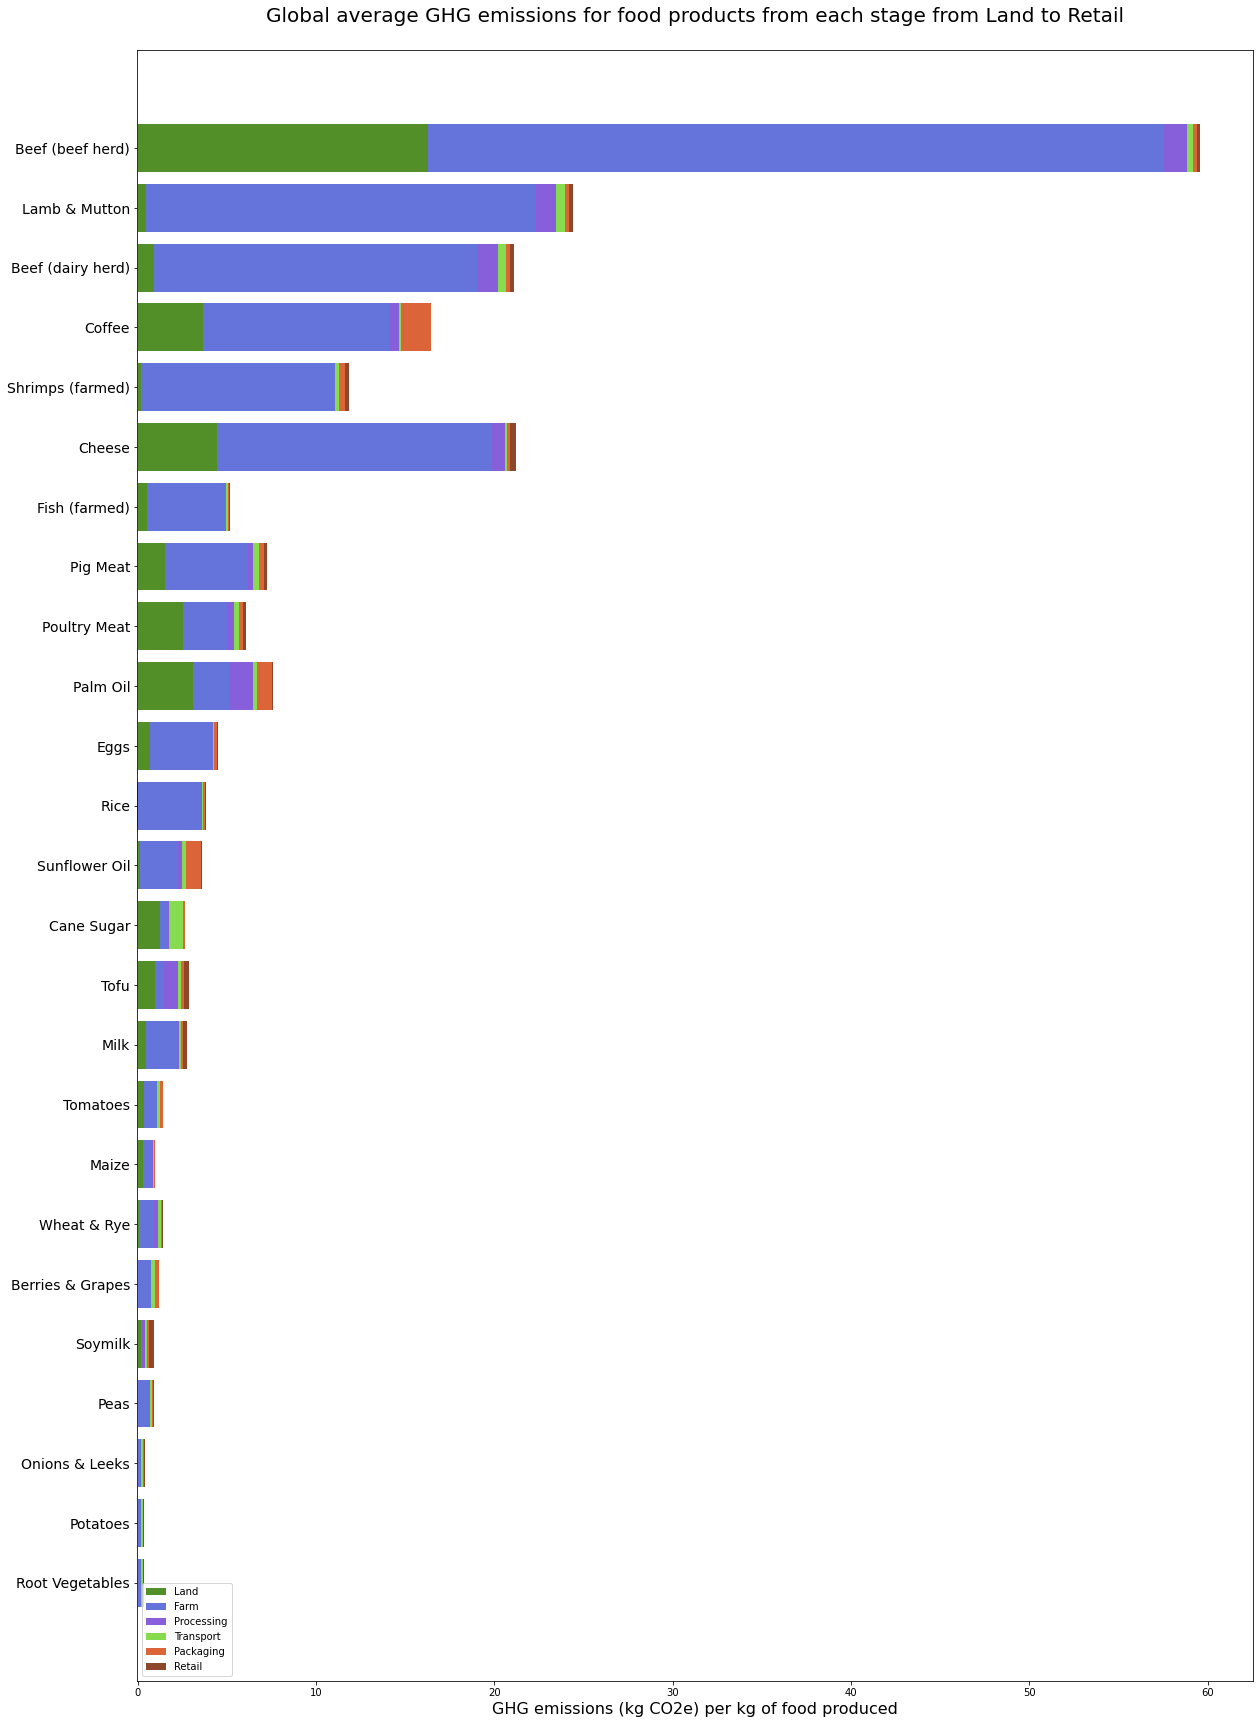

In [56]:
fig, ax = plt.subplots(figsize=(20,30))

fields = ['Land Use Change', 'Farm and Feed', 'Processing', 'Transport', 'Packaging', 'Retail']
colors = ['#528F28', '#6574DB', '#875FDB', '#87DB4F', '#DB6539', '#8F472C']
labels = ['Land', 'Farm', 'Processing', 'Transport', 'Packaging', 'Retail']

# plot bars
left = len(df_foods_sc) * [0]
for idx, name in enumerate(fields):
    plt.barh(df_foods_sc.index, df_foods_sc[name], left=left, color=colors[idx])
    left = left + df_foods_sc[name]
    
# title, legend, labels
plt.title('Global average GHG emissions for food products from each stage from Land to Retail\n', fontsize=20)
plt.legend(labels, loc='lower left')

plt.yticks(df_foods_sc.index, fontsize=14)
plt.xlabel('GHG emissions (kg CO2e) per kg of food produced', fontsize=16)

plt.show()